In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [20]:
sf_df = pd.read_csv('../data/snowfall.csv').set_index(['Region', 'Sub-Region', 'Resort'])
sd_df = pd.read_csv('../data/snow_depth.csv').set_index(['Region', 'Sub-Region', 'Resort'])

In [21]:
sf_df.head(3)

2009-05-12  \
Region        Sub-Region                             Resort                                                           
United States ('Alaska', '/alaska/ski-resorts.html') ('Alyeska Resort', '/alaska/alyeska-resort/ski-...         NaN   
                                                     ('Eaglecrest Ski Area', '/alaska/eaglecrest-ski...         NaN   
                                                     ('Hilltop Ski Area', '/alaska/hilltop-ski-area/...         NaN   

                                                                                                         2009-05-13  \
Region        Sub-Region                             Resort                                                           
United States ('Alaska', '/alaska/ski-resorts.html') ('Alyeska Resort', '/alaska/alyeska-resort/ski-...         NaN   
                                                     ('Eaglecrest Ski Area', '/alaska/eaglecrest-ski...         NaN   
                                                     ('Hilltop Ski Area', '/alaska/hilltop-ski-area/...         NaN   

                                                                                                         2009-05-14  \
Region        Sub-Region                             Resort                                                           
United States ('Alaska', '/alaska/ski-resorts.html') ('Alyeska Resort', '/alaska/alyeska-resort/ski-...         NaN   
                                                     ('Eaglecrest Ski Area', '/alaska/eaglecrest-ski...         NaN   
                                                     ('Hilltop Ski Area', '/alaska/hilltop-ski-area/...         NaN   

                                                                                                         2009-05-15  \
Region        Sub-Region                             Resort                                                           
United States ('Alaska', '/alaska/ski-resorts.html') ('Alyeska Resort', '/alaska/alyeska-resort/ski-...         NaN   
                                                     ('Eaglecrest Ski Area', '/alaska/eaglecrest-ski...         NaN   
                                                     ('Hilltop Ski Area', '/alaska/hilltop-ski-area/...         NaN   

                                                                                                         2009-05-27  \
Region        Sub-Region                             Resort                                                           
United States ('Alaska', '/alaska/ski-resorts.html') ('Alyeska Resort', '/alaska/alyeska-resort/ski-...         NaN   
                                                     ('Eaglecrest Ski Area', '/alaska/eaglecrest-ski...         NaN   
                                                     ('Hilltop Ski Area', '/alaska/hilltop-ski-area/...         NaN   

                                                                                                         2009-05-28  \
Region        Sub-Region                             Resort                                                           
United States ('Alaska', '/alaska/ski-resorts.html') ('Alyeska Resort', '/alaska/alyeska-resort/ski-...         NaN   
                                                     ('Eaglecrest Ski Area', '/alaska/eaglecrest-ski...         NaN   
                                                     ('Hilltop Ski Area', '/alaska/hilltop-ski-area/...         NaN   

                                                                                                         2009-05-29  \
Region        Sub-Region                             Resort                                                           
United States ('Alaska', '/alaska/ski-resorts.html') ('Alyeska Resort', '/alaska/alyeska-resort/ski-...         NaN   
                                                     ('Eaglecrest Ski Area', '/alaska/eaglecrest-ski...         NaN   
                                                     

In [25]:
def cols_as_dates(df):
    return [datetime.strptime(col, '%Y-%m-%d').date() for col in df.columns]

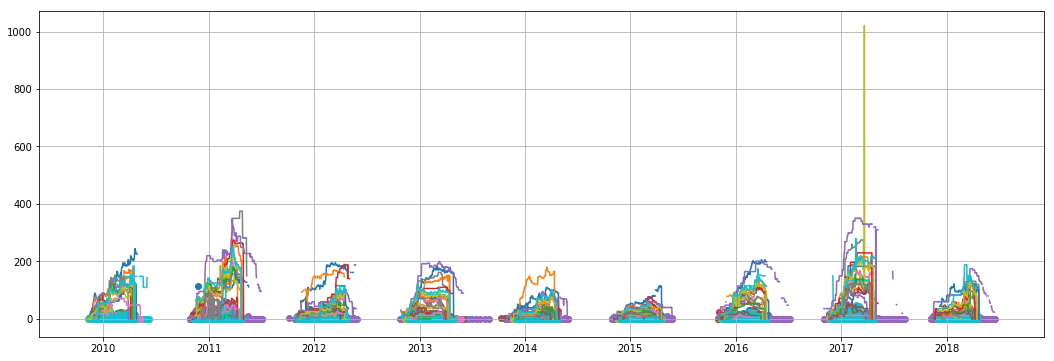

In [27]:
dates = cols_as_dates(sf_df)
plt.figure(figsize=(18,6))
for i in range(20):
    plt.scatter(dates, sf_df.iloc[i].values)
    plt.plot(dates, sd_df.iloc[i].values)
plt.grid()

[datetime.date(2009, 5, 12),
 datetime.date(2009, 5, 13),
 datetime.date(2009, 5, 14),
 datetime.date(2009, 5, 15),
 datetime.date(2009, 5, 27),
 datetime.date(2009, 5, 28),
 datetime.date(2009, 5, 29),
 datetime.date(2009, 5, 30),
 datetime.date(2009, 5, 31),
 datetime.date(2009, 6, 1),
 datetime.date(2009, 6, 2),
 datetime.date(2009, 6, 3),
 datetime.date(2009, 6, 4),
 datetime.date(2009, 6, 5),
 datetime.date(2009, 6, 6),
 datetime.date(2009, 6, 7),
 datetime.date(2009, 6, 8),
 datetime.date(2009, 6, 9),
 datetime.date(2009, 6, 10),
 datetime.date(2009, 6, 11),
 datetime.date(2009, 6, 12),
 datetime.date(2009, 6, 13),
 datetime.date(2009, 6, 14),
 datetime.date(2009, 6, 15),
 datetime.date(2009, 6, 16),
 datetime.date(2009, 6, 17),
 datetime.date(2009, 6, 18),
 datetime.date(2009, 6, 19),
 datetime.date(2009, 6, 20),
 datetime.date(2009, 6, 21),
 datetime.date(2009, 6, 22),
 datetime.date(2009, 6, 23),
 datetime.date(2009, 6, 24),
 datetime.date(2009, 6, 25),
 datetime.date(2009, 6,